In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch

In [2]:
#Cargamos los datos
data= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv')
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
x= data.iloc[:,1:-1].to_numpy()
y= data['y'].to_numpy()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)


In [3]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Vamos a realizar nuestro modelo de convolución. En este caso yo quiero que el kernel inicial sea de 10 y se mueva ed a 2.
Luego quiero realizar una pooling layer de  tamaño de kernel 2, otra red convolucionada 1D con kernel 5 y otra pooling layer de tamaño de kernel 3

In [9]:

model = torch.nn.Sequential(
    torch.nn.Conv1d(1, 10, kernel_size=10, stride=2),
    torch.nn.MaxPool1d(kernel_size=2),
    torch.nn.Conv1d(10, 1, kernel_size=2, stride=1),
    torch.nn.MaxPool1d(kernel_size=3),
    torch.nn.Linear(13, 10)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #lr: learning rate

In [10]:

epochs = 60
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)
F1_values_test = np.zeros(epochs)

inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
targets = torch.autograd.Variable(torch.Tensor(Y_train).long())
for epoch in range(epochs):
    X_new = np.expand_dims(X_train, 1) 
    inputs = torch.autograd.Variable(torch.Tensor(X_new).float())
    targets = torch.autograd.Variable(torch.Tensor(Y_train).long())
    
    optimizer.zero_grad()
    out = model(inputs)
    out = out.squeeze(dim=1) # necesario para quitar la dimension intermedia de channel
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(Y_train, Y_predicted, average='macro')
    
    X_new = np.expand_dims(X_test, 1)
    inputs_test = torch.autograd.Variable(torch.Tensor(X_new).float())
    out_test = model(inputs_test)
    out_test = out_test.squeeze(dim=1)
    values, Y_predicted_test = torch.max(out_test.data, 1)
    F1_values_test[epoch] = sklearn.metrics.f1_score(Y_test, Y_predicted_test, average='macro')

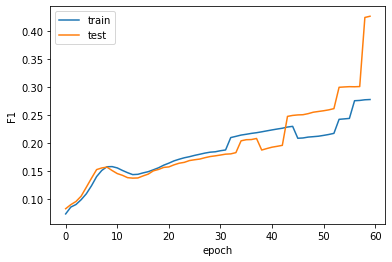

In [11]:
plt.plot(np.arange(epochs), F1_values_train, label='train')
plt.plot(np.arange(epochs), F1_values_test, label='test')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.legend()

Text(0, 0.5, 'loss')

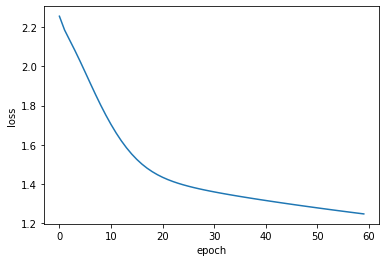

In [12]:
plt.plot(np.arange(epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

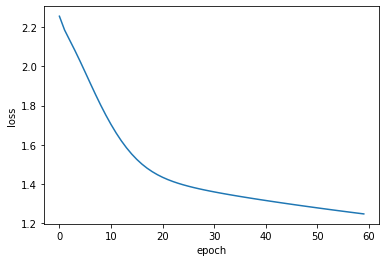

In [13]:
plt.plot(np.arange(epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')